# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Buana Dewi
- **Email:** buanadewi24@gmail,com
- **ID Dicoding:** buana_dewi_zdmh

## Menentukan Pertanyaan Bisnis

- Pada kondisi kapan peminjaman sepeda paling tinggi dan terendah?(workingday,holiday dan weekday)
- Bagaimana tren penggunaan sepeda pada tahun 2011, mana bulan yang paling unggul?
- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
- Pada musim mana yang mencapai pengguna sepeda terbanyak?(casual,registered)

## Import Semua Packages/Library yang Digunakan

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Dataset Bike Sharing berisi informasi tentang penggunaan layanan penyewaan sepeda di sebuah kota. Dengan layanan ini pengguna dengan mudah menyewa sepeda dari satu lokasi dan mengembalikannya ke tempat lain. Layanan ini mencatat durasi perjalanan serta lokasi keberangkatan dan kedatangan. Tujuan dataset ini untuk menganalisis dan memahami pola penggunaaan bike sharing, memprediksi permintaan bike sharing dan mengevaluasi efektivitas layanan bike sharing. dataset ini diambil dari platform kaggle

In [86]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [87]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

1. checking data type


In [88]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


2. checking missing value

In [89]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [90]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [91]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [92]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [93]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [94]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [95]:
day_df.isna().describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731,731,731,731,731,731,731,731,731,731,731,731,731,731
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,731,731,731,731,731,731,731,731,731,731,731,731,731,731,731,731


In [96]:
hour_df.isna().describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379


### Cleaning Data

In [97]:
day_df.replace({
    "season" :{1: "Spring", 2:"Summer", 3:"Fall", 4:"Winter"},
    "yr":{0:2011, 1:2012},
    "holiday":{0:"Not-Holiday", 1:"Holiday"},
    "workingday":{0:"Weekend", 1:"Workding_day"},
    "weathersit":{1:"Clear", 2:"Cloudy/Misty", 3:"Light Snow/Rain", 4:"Severe Weather"},
    "weekday":{0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday",5:"Friday", 6:"Saturday"},
    "mnth":{1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August",
              9:"September", 10:"October", 11:"November", 12: "Desember"}
}, inplace=True)

In [98]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,Not-Holiday,Saturday,Weekend,Cloudy/Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,Not-Holiday,Sunday,Weekend,Cloudy/Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,Not-Holiday,Monday,Workding_day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,Not-Holiday,Tuesday,Workding_day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,Not-Holiday,Wednesday,Workding_day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [99]:
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,Not-Holiday,Saturday,Weekend,Cloudy/Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,Not-Holiday,Sunday,Weekend,Cloudy/Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,Not-Holiday,Monday,Workding_day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,Not-Holiday,Tuesday,Workding_day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,Not-Holiday,Wednesday,Workding_day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [100]:
print(day_df.isnull().sum())

instant       0
dateday       0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


save cleaned dataset


In [101]:
day_df.to_csv("all_data.csv" ,index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

In [102]:
day_df.dtypes

instant         int64
dateday        object
season         object
year            int64
month          object
holiday        object
weekday        object
workingday     object
weather        object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [103]:
day_df.groupby(by='weather').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
                  max  min         mean      sum
weather                                         
Clear            8714  431  4876.786177  2257952
Cloudy/Misty     8362  605  4035.862348   996858
Light Snow/Rain  4639   22  1803.285714    37869

In [104]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
              max   min         mean      sum
holiday                                      
Holiday      7403  1000  3735.000000    78435
Not-Holiday  8714    22  4527.104225  3214244

In [105]:
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

count                   
            max   min         mean
weekday                           
Friday     8362  1167  4690.288462
Monday     7525    22  4338.123810
Saturday   8714   627  4550.542857
Sunday     8227   605  4228.828571
Thursday   7804   431  4667.259615
Tuesday    7767   683  4510.663462
Wednesday  8173   441  4548.538462

In [106]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

count                  
               max  min         mean
workingday                          
Weekend       8714  605  4330.168831
Workding_day  8362   22  4584.820000

In [107]:
day_df.groupby(by='weather').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                  
                       mean         mean   max  min         mean
weather                                                         
Clear            964.030238  3912.755940  8714  431  4876.786177
Cloudy/Misty     687.352227  3348.510121  8362  605  4035.862348
Light Snow/Rain  185.476190  1617.809524  4639   22  1803.285714

In [108]:
condition_df= day_df.groupby(by=['workingday', 'holiday', 'weekday']).agg({
    'count': ['max', 'min', 'mean']
}).reset_index()
condition_df.head()

workingday  holiday    weekday count                   
                                   max   min         mean
0    Weekend  Holiday     Friday  3368  3126  3247.000000
1    Weekend  Holiday     Monday  6370  1000  3973.666667
2    Weekend  Holiday   Thursday  2425  1495  1960.000000
3    Weekend  Holiday    Tuesday  1013  1013  1013.000000
4    Weekend  Holiday  Wednesday  7403  7403  7403.000000

In [109]:
seasonly_users_df = day_df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

seasonly_users_df.head()

,casual,registered,count
season,,,
Fall,226091,835038,1061129
Spring,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


In [110]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
            max   min         mean     sum
month                                     
April      7460   795  4484.900000  269094
August     7865  1115  5664.419355  351194
Desember   6606   441  3403.806452  211036
February   5062  1005  2655.298246  151352
January    4521   431  2176.338710  134933
July       8173  3285  5563.677419  344948
June       8120  3767  5772.366667  346342
March      8362   605  3692.258065  228920
May        8294  2633  5349.774194  331686
November   6852  1495  4247.183333  254831
October    8156    22  5199.225806  322352
September  8714  1842  5766.516667  345991

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana kondisi yang tampak ketika sepeda digunakan pada workingday, holiday, dan weekday?

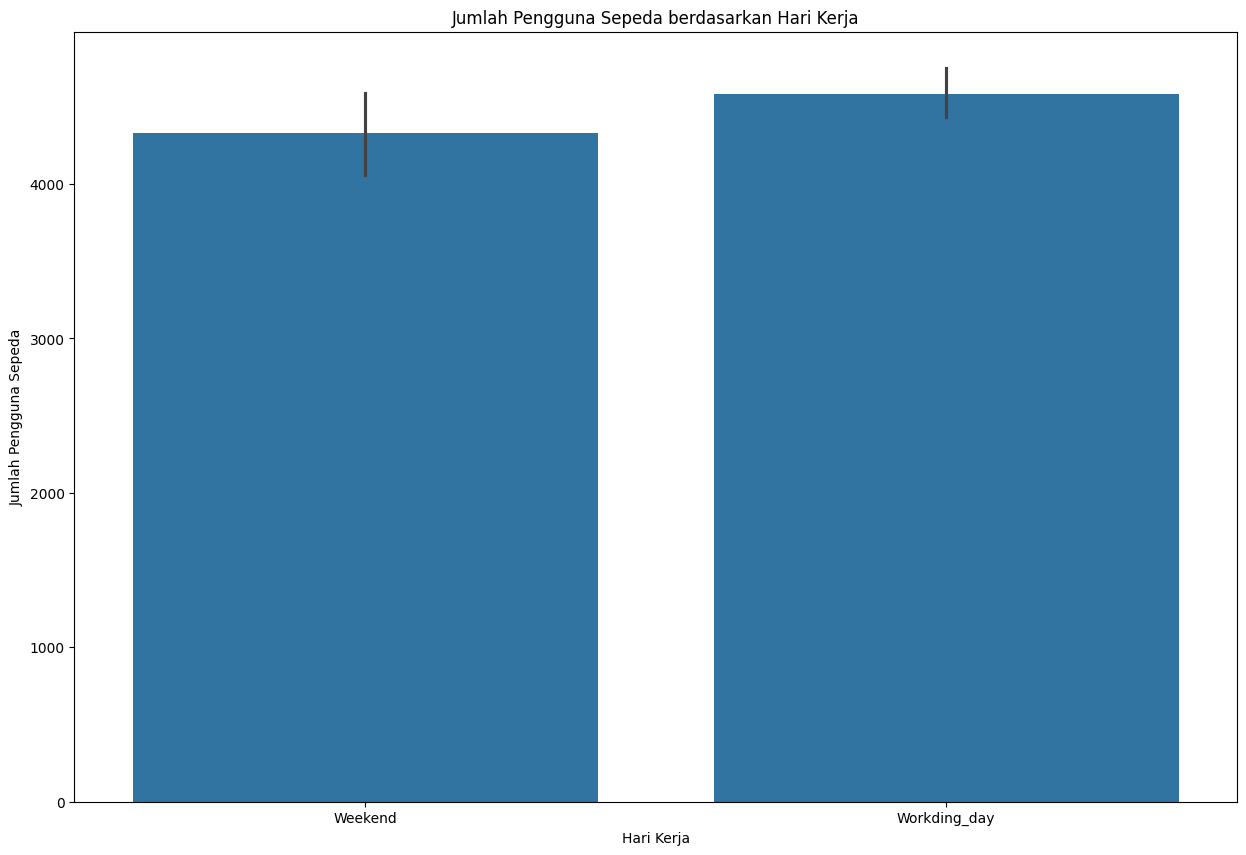

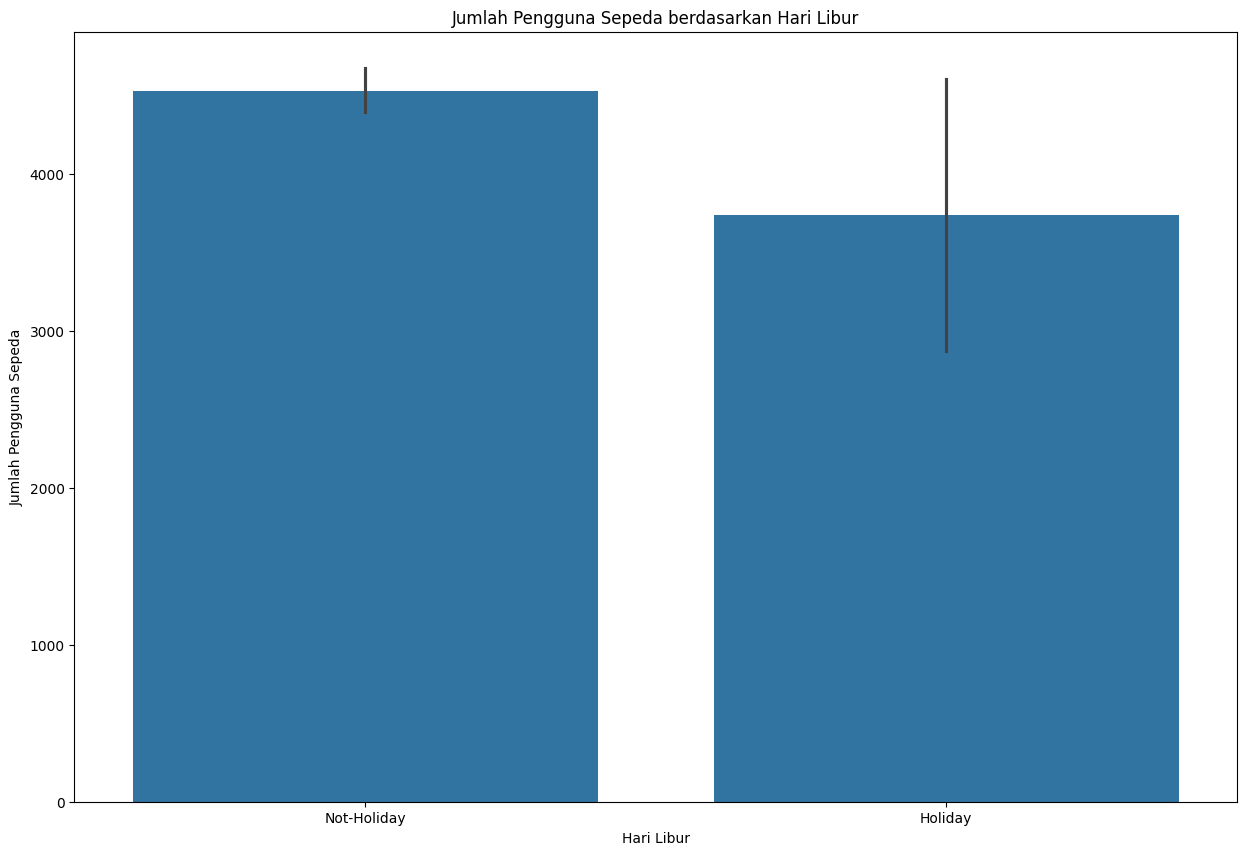

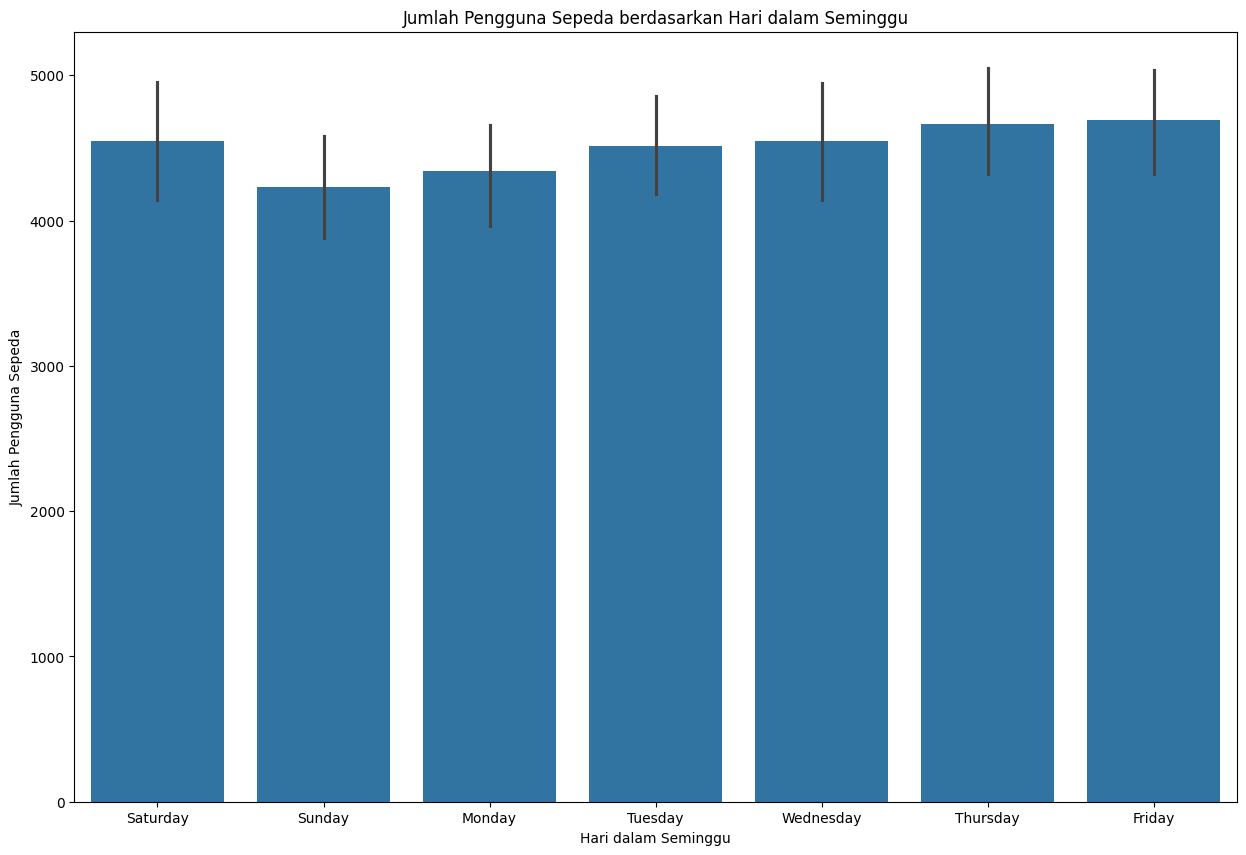

In [111]:
# Berdasarkan workingday
plt.figure(figsize=(15, 10))
sns.barplot(
    x='workingday',
    y='count',
    data=day_df
)
plt.title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

# Berdasarkan holiday
plt.figure(figsize=(15, 10))
sns.barplot(
    x='holiday',
    y='count',
    data=day_df
)
plt.title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
plt.xlabel('Hari Libur')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

# Berdasarkan weekday
plt.figure(figsize=(15, 10))
sns.barplot(
    x='weekday',
    y='count',
    data=day_df
)
plt.title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()


Berdasarkan hasil visualisasi menggunakan barplot, dapat disimpulkan bahwa:

1. Jumlah peminjam sepeda lebih tinggi pada hari kerja (Senin-Jumat) dibandingkan akhir pekan (Sabtu-Minggu).

2. Peminjaman sepeda cenderung lebih tinggi pada hari-hari biasa (non-hari libur) daripada pada hari libur nasional.

3. Jumat mencatat jumlah peminjam sepeda tertinggi, sementara Minggu memiliki jumlah peminjam sepeda yang paling rendah, membentuk rentang variabilitas yang signifikan di antara hari-hari dalam seminggu.

### Pertanyaan 2: bagaimana tren penggunaan sepeda pada tahun 2011, mana bulan yang paling unggul?

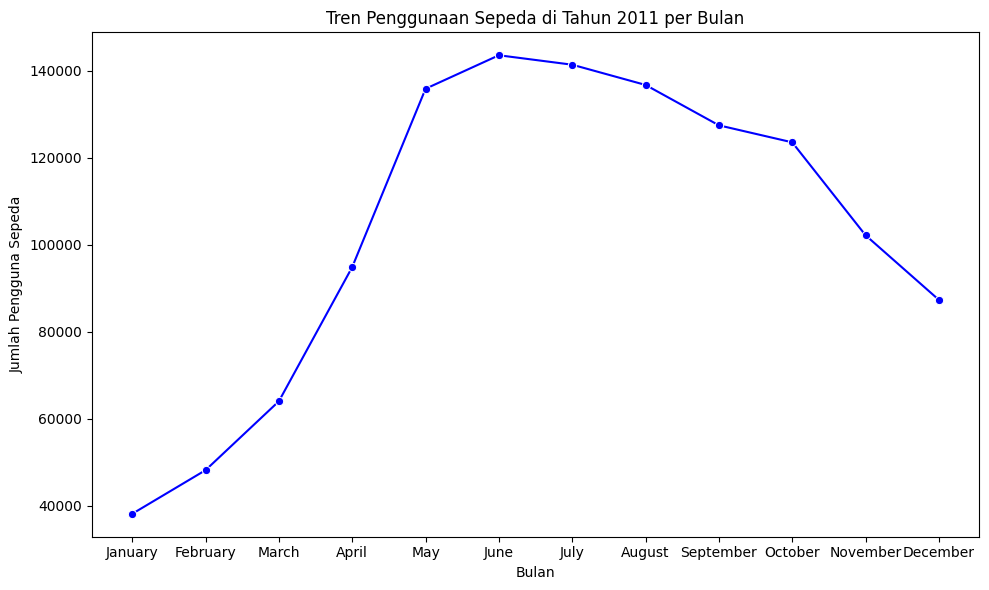

In [112]:
day_df['dateday'] = pd.to_datetime(day_df['dateday'])

data_2011 = day_df[day_df['dateday'].dt.year == 2011]
monthly_total = data_2011.groupby(data_2011['dateday'].dt.month)['count'].sum()
bulan_terbaik = monthly_total.idxmax()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_total.index.map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}),
             y=monthly_total.values, color='blue', marker='o')

plt.title('Tren Penggunaan Sepeda di Tahun 2011 per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.tight_layout()
plt.show()

Berdasarkan grafik garis yang telah disajikan, dapat disimpulkan bahwa puncak penyewaan sepeda terjadi pada bulan Juni tahun 2011, sedangkan bulan yang memiliki tingkat penyewaan terendah adalah Januari.

###Pertanyaan 3 : Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?

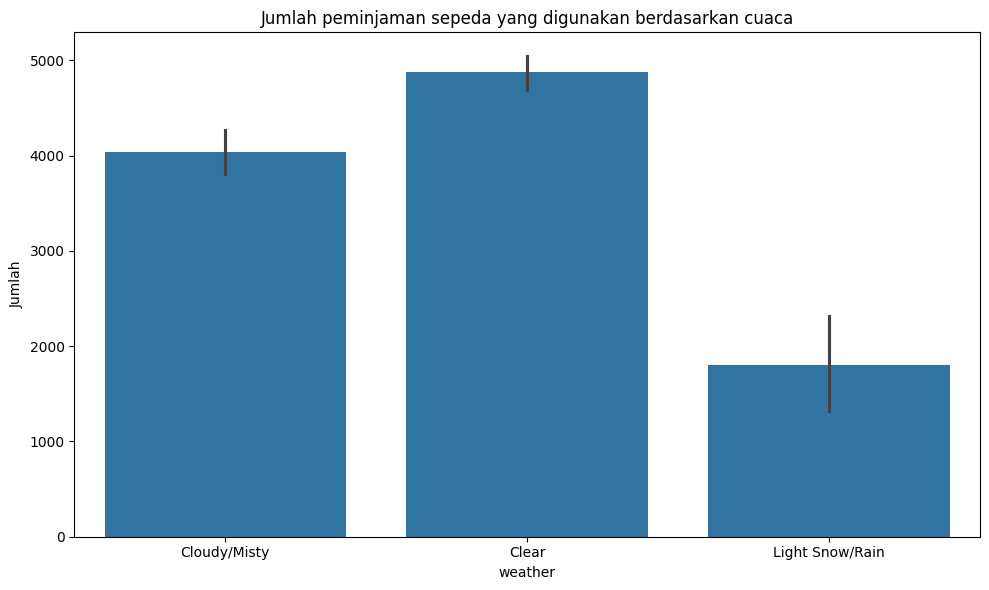

In [113]:
plt.figure(figsize=(10,6))
sns.barplot(data=day_df, x="weather", y="count")
plt.ylabel("Jumlah")
plt.title ("Jumlah peminjaman sepeda yang digunakan berdasarkan cuaca")
plt.tight_layout()
plt.show()

Berdasarkan barplot di atas, dapat disimpulkan bahwa terdapat korelasi yang jelas antara kondisi cuaca dan jumlah penyewaan sepeda. Kondisi cuaca yang cerah atau sebagian berawan menunjukkan tingkat minat tertinggi, diikuti dengan kondisi berkabut atau berawan, sedangkan kondisi bersalju ringan atau hujan menunjukkan tingkat minat terendah.

###Pertanyaan 4: Pada musim mana yang mencapai pengguna sepeda terbanyak?(berdasarkan jumlah casual, registered)

In [114]:
season_df = seasonly_users_df.reset_index()

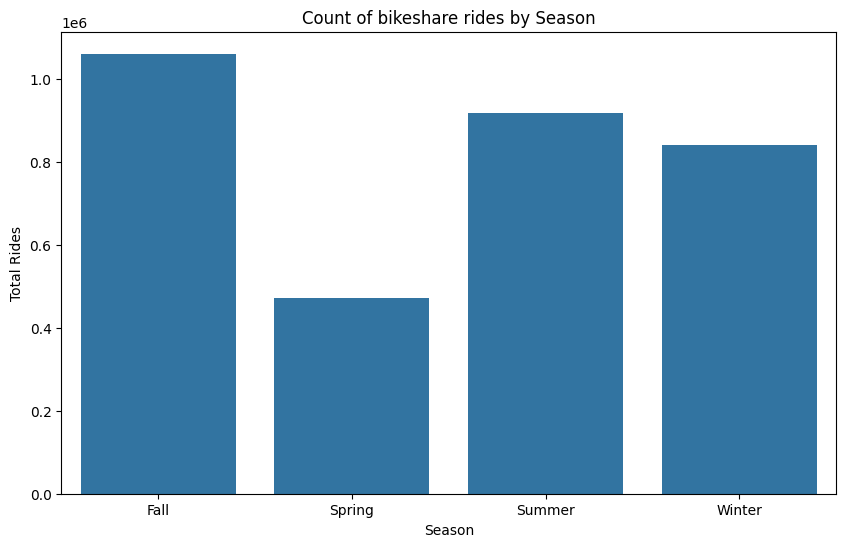

In [115]:
plt.figure(figsize=(10,6))

sns.barplot(x="season", y="count", data=season_df)

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

Berdasarkan hasil analisis diatas menggunakan barplot, dapat disimpulkan bahwa musim Fall memiliki total riders yang paling banyak dibanding musim yang lain. hal ini menunjukkan musim berpengaruh pada penyewa dikarenakan juga keadaan jalan dan aktivitas yang dilakukan pada musim itu.

## Conclusion

- Conclution pertanyaan 1 : Visualisasi ini dapat dibagi menjadi tiga aspek. Pertama, dalam hal jumlah pengguna sepeda berdasarkan workingday, terlihat bahwa penggunaan sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur, meskipun perbedaannya tidak terlalu signifikan. Kedua, jika dilihat dari perspektif hari libur (holiday), terlihat bahwa penggunaan sepeda lebih tinggi pada hari-hari biasa daripada saat hari libur, dan perbedaannya cukup mencolok. Ini menunjukkan bahwa pengguna cenderung lebih suka menyewa sepeda saat hari biasa. Terakhir, berdasarkan hari dalam seminggu (weekday), Jumat (Friday) menonjol sebagai hari dengan jumlah pengguna tertinggi.
- Conclution pertanyaan 2 : Berdasarkan grafik garis yang telah disajikan, dapat disimpulkan bahwa puncak penyewaan sepeda terjadi pada bulan Juni tahun 2011, sedangkan bulan yang memiliki tingkat penyewaan terendah adalah Januari. Hal ini dapat diamati pada visualisasi bahwa jumlah total sepeda disewakan pada bulan juni lebih tinggi dari bulan yang lain.
- Conclution pertanyaan 3 :Berdasarkan barplot di atas, dapat disimpulkan bahwa terdapat korelasi yang jelas antara kondisi cuaca dan jumlah penyewaan sepeda. Kondisi cuaca yang cerah atau sebagian berawan menunjukkan tingkat minat tertinggi, diikuti dengan kondisi berkabut atau berawan, sedangkan kondisi bersalju ringan atau hujan menunjukkan tingkat minat terendah. Terlihat bahwa para penyewa sepeda cenderung menyewa pada saat cuaca ketika sedang cerah atau mendung. ketika salju turun kemungkinan kecil hingga tidak ada penyewa.
- conclusion pertanyaan 4 : Pada visualisasi terakhir, ternyata hasil yang didapatkan pada musim Fall meraih penyewaan sepeda sebanyak lebih dari 1.0.Hal ini bisa diakibatkan oleh banyak faktor seperti kondisi cuaca, temperatur udara, hari kerja, hari libur, dan lain-lain. Sedangkan urutan terakhirnya ditempati oleh musim dingin(spring) yang hanya mencapai 0.5.